In [17]:
"""
make_classification함수는 설정에 따른 분류용 가상 데이터를 생성하는 명령이다. 이 함수의 인수와 반환값은 다음과 같다.
인수:
n_samples : 표본 데이터의 수, 디폴트 100
n_features : 독립 변수의 수, 디폴트 20
n_informative : 독립 변수 중 종속 변수와 상관 관계가 있는 성분의 수, 디폴트 2
n_redundant : 독립 변수 중 다른 독립 변수의 선형 조합으로 나타나는 성분의 수, 디폴트 2
n_repeated : 독립 변수 중 단순 중복된 성분의 수, 디폴트 0
n_classes : 종속 변수의 클래스 수, 디폴트 2
n_clusters_per_class : 클래스 당 클러스터의 수, 디폴트 2
weights : 각 클래스에 할당된 표본 수
random_state : 난수 발생 시드
반환값:
X : [n_samples, n_features] 크기의 배열
독립 변수
y : [n_samples] 크기의 배열
종속 변수
"""
import warnings
warnings.filterwarnings(action='ignore')

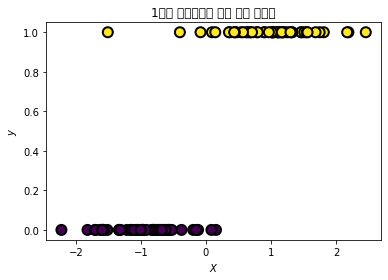

In [9]:
# 분류용 가상 데이터 생성
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

plt.title("1개의 독립변수를 가진 가상 데이터")
X, y = make_classification(n_features=1, n_informative=1,
                           n_redundant=0, n_clusters_per_class=1, random_state=4)
plt.scatter(X, y, marker='o', c=y,
            s=100, edgecolor="k", linewidth=2)

plt.xlabel("$X$")
plt.ylabel("$y$")
plt.show()

# 1개의 독립변수를 가지고 2개의 클래스를 가지는 가상 데이터 

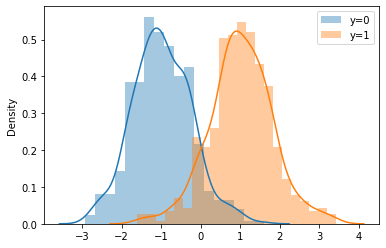

In [18]:
import seaborn as sns

sns.distplot(X[y == 0], label="y=0")
sns.distplot(X[y == 1], label="y=1")
plt.legend()
plt.show()

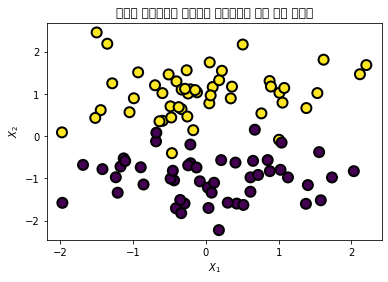

In [19]:
# 2개의 독립변수, 2개의 클래스 가지는 데이터 생성 
# n_informative=1 : 2개의 독립변수 중 실제로 타겟 클래스와 상관관계에 있는 것은 1개의 독립변수임 

plt.title("하나의 독립변수만 클래스와 상관관계가 있는 가상 데이터")
X, y = make_classification(n_features=2, n_informative=1, n_redundant=0,
                           n_clusters_per_class=1, random_state=4)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=100, edgecolor="k", linewidth=2)

plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()
# 하나의 독립변수만 클래스와 상관관계가 있는 가상 데이터 

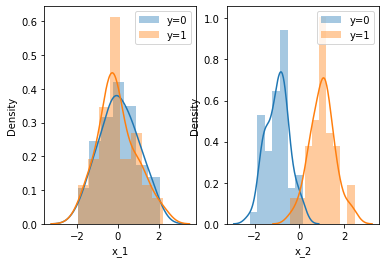

In [20]:
plt.subplot(121)
sns.distplot(X[y == 0, 0], label="y=0")
sns.distplot(X[y == 1, 0], label="y=1")
plt.legend()
plt.xlabel("x_1")
plt.subplot(122)
sns.distplot(X[y == 0, 1], label="y=0")
sns.distplot(X[y == 1, 1], label="y=1")
plt.legend()
plt.xlabel("x_2")
plt.show()

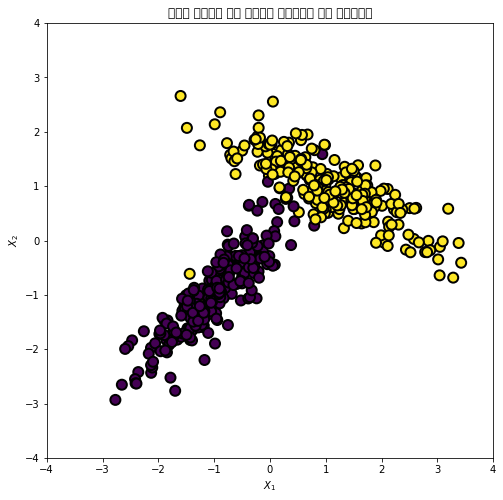

In [21]:
plt.figure(figsize=(8, 8))
plt.title("두개의 독립변수 모두 클래스와 상관관계가 있는 가상데이터")
X, y = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, random_state=6)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=100, edgecolor="k", linewidth=2)

plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

# 두 개의 독립변수 모두 클래스와 상관관계가 있는 가상의 데이터 

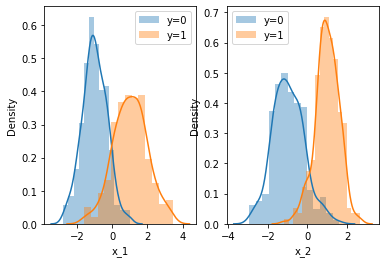

In [22]:
plt.subplot(121)
sns.distplot(X[y == 0, 0], label="y=0")
sns.distplot(X[y == 1, 0], label="y=1")
plt.legend()
plt.xlabel("x_1")
plt.subplot(122)
sns.distplot(X[y == 0, 1], label="y=0")
sns.distplot(X[y == 1, 1], label="y=1")
plt.legend()
plt.xlabel("x_2")
plt.show()

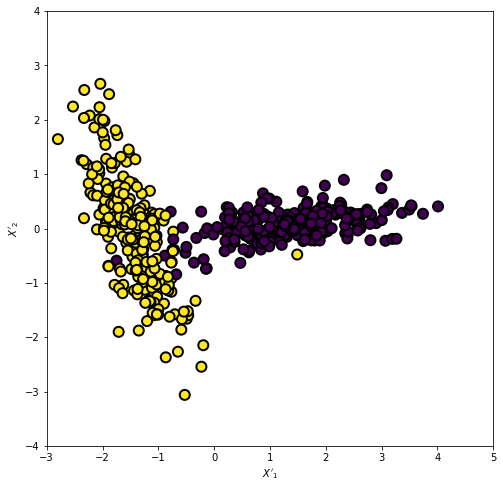

In [24]:
import numpy as np

l, V = np.linalg.eig(X.T @ X)
X2 = -X @ V

plt.figure(figsize=(8, 8))
plt.scatter(X2[:, 0], X2[:, 1], marker='o', c=y, s=100, edgecolor="k", linewidth=2)
plt.xlabel("$X'_1$")
plt.ylabel("$X'_2$")
plt.xlim(-3, 5)
plt.ylim(-4, 4)
plt.show()

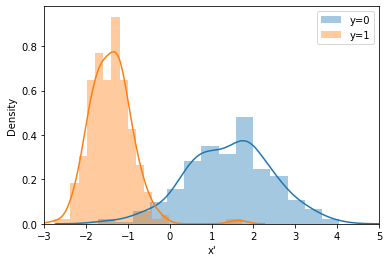

In [25]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)

sns.distplot(X_pca[y == 0], label="y=0")
sns.distplot(X_pca[y == 1], label="y=1")
plt.legend()
plt.xlabel("x'")
plt.xlim(-3, 5)
plt.show()

각 클래스별 데이터의 갯수 - 0 클래스 : 90, 1 클래스 : 10


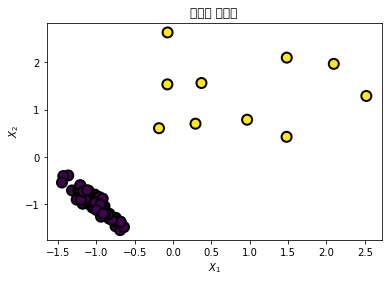

In [26]:
# 클래스 별 데이터의 갯수에 차이를 주고 싶을 땐, weights 인수 설정 

plt.title("비대칭 데이터")
X, y = make_classification(n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, weights=[0.9, 0.1], random_state=6)
val, cnt = np.unique(y, return_counts=True)
print("각 클래스별 데이터의 갯수 - {} 클래스 : {}, {} 클래스 : {}".format(val[0], cnt[0], val[1], cnt[1]))

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=100, edgecolor="k", linewidth=2)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

# 비대칭 데이터

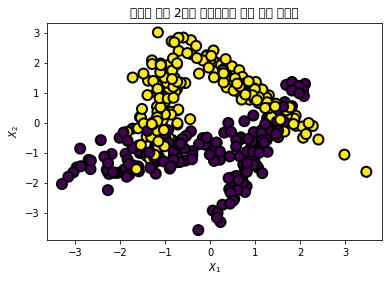

In [27]:
# n_clusters_per_class=2 : 클래스 당 클러스터 갯수를 늘리면 다음 코드의 결과처럼 클래스끼리 잘 분리되어 있지 않은 가상 데이터 득 

plt.title("클래스 내에 2개의 클러스터가 있는 가상 데이터")
X2, Y2 = make_classification(n_samples=400, n_features=2, n_informative=2, n_redundant=0,
                             n_clusters_per_class=2, random_state=0)
plt.scatter(X2[:, 0], X2[:, 1], marker='o', c=Y2,
            s=100, edgecolor="k", linewidth=2)

plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

# 클래스 내에 2개의 클러스터가 있는 가상 데이터 

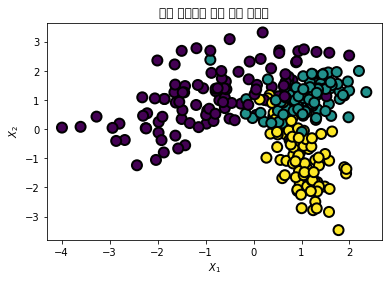

In [28]:
plt.title("다중 클래스를 가진 가상 데이터")
X, y = make_classification(n_samples=300, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, n_classes=3, random_state=0)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=100, edgecolor="k", linewidth=2)

plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

# 다중 클래스를 가진 가상 데이터 

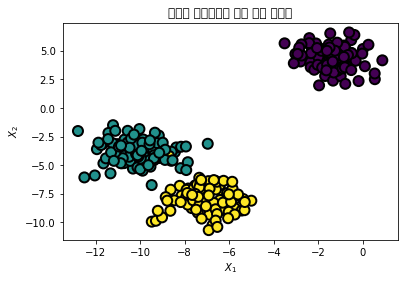

In [29]:
from sklearn.datasets import make_blobs

plt.title("세개의 클러스터를 가진 가상 데이터")
X, y = make_blobs(n_samples=300, n_features=2, centers=3, random_state=1)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=100,
            edgecolor="k", linewidth=2)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

# 3개의 클러스터를 가진 가상 데이터 

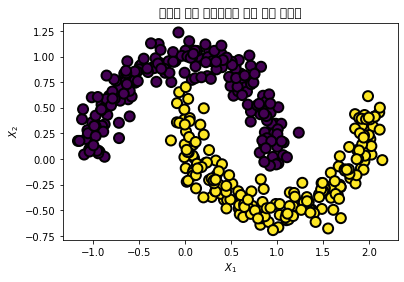

In [30]:
from sklearn.datasets import make_moons

plt.title("초승달 모양 클러스터를 가진 가상 데이터")
X, y = make_moons(n_samples=400, noise=0.1, random_state=0)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=100,
            edgecolor="k", linewidth=2)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

# 초승달 모양 클러스터를 가진 가상 데이터 

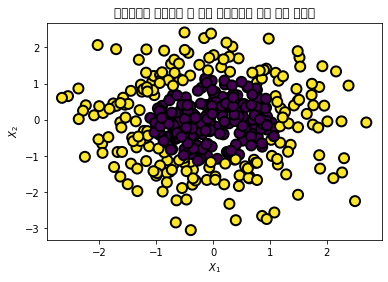

In [31]:
from sklearn.datasets import make_gaussian_quantiles

plt.title("등고선으로 구분되는 두 개의 클러스터를 가진 가상 데이터")
X, y = make_gaussian_quantiles(n_samples=400, n_features=2, n_classes=2, random_state=0)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=100,
            edgecolor="k", linewidth=2)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

# 등고선으로 구분되는 두 개의 클러스터를 가진 가상 데이터 